In [186]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from numpy.core.umath import sqrt
from sklearn.model_selection import train_test_split
from sklearn.tree            import DecisionTreeClassifier
from sklearn.metrics         import accuracy_score
from sklearn                 import tree

In [187]:
df = pd.read_csv("house-votes-84.data.csv",header=None)
#df.head()

In [188]:
# replaces ? with the majority of votes
for i in df:
    df[i].replace('?', df[i].value_counts().idxmax() , inplace = True)
#df

In [189]:
#dependent variable
y = df[0]

#independent variables
x = df.drop(0,axis=1)

y.replace('republican',1 ,inplace = True)
y.replace('democrat', 0,inplace = True)

x.replace('y',1 ,inplace = True)
x.replace('n',0 ,inplace = True)

In [190]:
test = [0.5, 0.6, 0.7, 0.75 , 0.8]
#rand = [1, 2, 3, 4, 5]
rows = cols = 5

In [191]:
accuracy = [[0 for i in range(cols)] for j in range(rows)]
#for row in accuracy:
#    print(row)
accuracy[4]

[0, 0, 0, 0, 0]

In [196]:
iterator = 0
accuracy = [[0 for i in range(cols)] for j in range(rows)]
treesize = [[0 for i in range(cols)] for j in range(rows)]

for size in test:
    
    x_train,x_test,y_train,y_test = train_test_split(x ,y ,test_size = size )
    
    for i in range(5):
       
        model = DecisionTreeClassifier(random_state=(i+1))
        model.fit(x_train,y_train)
        y_predicted = model.predict(x_test)
        accuracy[iterator][i] = accuracy_score(y_test, y_predicted) 
        treesize[iterator][i] = (model.tree_).node_count
        
    iterator=iterator+1

minmum for test size  0.5 is 0.9174311926605505
maximum for test size  0.5 is 0.9174311926605505
average for test size  0.5 is 0.9174311926605505
Tree size =  31 

minmum for test size  0.4 is 0.8888888888888888
maximum for test size  0.4 is 0.9348659003831418
average for test size  0.4 is 0.906513409961686
Tree size =  35 

minmum for test size  0.30000000000000004 is 0.9442622950819672
maximum for test size  0.30000000000000004 is 0.9508196721311475
average for test size  0.30000000000000004 is 0.9488524590163934
Tree size =  15 

minmum for test size  0.25 is 0.9235474006116208
maximum for test size  0.25 is 0.9388379204892966
average for test size  0.25 is 0.9333333333333333
Tree size =  25 

minmum for test size  0.19999999999999996 is 0.9482758620689655
maximum for test size  0.19999999999999996 is 0.9540229885057471
average for test size  0.19999999999999996 is 0.9511494252873562
Tree size =  9 

Accuracy graph


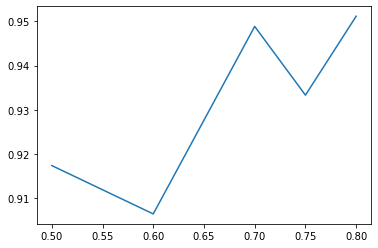

In [199]:
i = 0
mean_accuracy = []

for size in test:
    print('minmum for test size ',1-size,'is',min(accuracy[i]))
    print('maximum for test size ',1-size,'is',max(accuracy[i]))
    print('average for test size ',1-size,'is',sum(accuracy[i])/5)
    print('Tree size = ', max(treesize[i]),'\n')
    mean_accuracy.append(sum(accuracy[i])/5)
    i = i + 1
    
train = [x for x in test] 
print('Accuracy graph')   
plt.plot(train , mean_accuracy)
plt.show()
print('\n')   